# Proposal

1. Project/challenge Name
  - Managing Power Generation through Prediction of Demand

2. Problem description - specify if it is supervised or unsupervised
  - Supervised Learning
    - Target: power generation output as reported by the Independent Electricity System Operator (IESO)

3. Data format: tabular (csv), text, image, video, audio, etc
  - csv

4. Data size: number of records and features
  - Number of records: ~44,000 records over five years
  - Features:
    - Weather (various)
    - Power demand (consumption)
    - Region
    - "Fuel Type" (Nuclear, Hydro, Wind, etc.)
    - Industrial load by sector
    - Day of the week
    - Hour
    - Public holidays
    - "On-peak/Off-peak" indicator

5. Data source - link to data file
  - http://reports.ieso.ca/public/GenOutputbyFuelHourly/
  - http://reports.ieso.ca/public/DemandZonal/
  - http://reports.ieso.ca/public/IndustrLoadBySector/

6. Link to the competition page
  - Public utility has no competition in Ontario
7. Your motivation to work on this project
  - Personal interest in the transition to renewable sources of energy

# Set up

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Supply Datasets (2017 - 2019) - Load, Join, Process
- Supply = Generator Output

## Load Supply Datasets

In [5]:
path = '/content/drive/My Drive/Colab Notebooks/3253 Machine Learning/3253_ML_Final_Project_Candidates/IESO_Dataset_1/'

#2017 Hourly Generator Output File: 2017_Hourly_Output.csv
supply_2017 = pd.read_csv(path+'2017_Hourly_Output.csv', parse_dates=['Date'])
display(supply_2017.head(3))

#2018
supply_2018 = pd.read_csv(path+'2018_Hourly_Output.csv', parse_dates=['Date'])
display(supply_2018.head(3))

#2019
supply_2019 = pd.read_csv(path+'2019_Hourly_Output.csv', parse_dates=['Date'])
display(supply_2019.head(3))

,Date,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output
0,2017-01-01,1,11592,234,2455,2433,0,1,16715
1,2017-01-01,2,11591,235,2523,1994,0,1,16344
2,2017-01-01,3,11596,234,2464,1647,0,1,15942


,Date,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output
0,2018-01-01,1,11671,1583,4152,992,0,3,18401
1,2018-01-01,2,11672,1192,4093,1124,0,1,18082
2,2018-01-01,3,11672,1040,4231,1265,0,0,18208


,Date,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output
0,2019-01-01,1,11215,232,3320,1302,0,10,16079
1,2019-01-01,2,11221,233,3274,1146,0,10,15884
2,2019-01-01,3,11205,233,3222,992,0,10,15662


## Join Supply Datasets

In [6]:
supply = pd.concat([supply_2017, supply_2018, supply_2019])
display(supply.head(3))
supply.shape

,Date,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output
0,2017-01-01,1,11592,234,2455,2433,0,1,16715
1,2017-01-01,2,11591,235,2523,1994,0,1,16344
2,2017-01-01,3,11596,234,2464,1647,0,1,15942


(26280, 9)

## Augment Supply Dataset

In [7]:
# Move Date column to index
supply = supply.set_index('Date')

# Add weekday column
supply['Day'] = supply.index.strftime('%A')
supply.head(3)

,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output,Day
Date,,,,,,,,,
2017-01-01,1,11592,234,2455,2433,0,1,16715,Sunday
2017-01-01,2,11591,235,2523,1994,0,1,16344,Sunday
2017-01-01,3,11596,234,2464,1647,0,1,15942,Sunday


## Plot Supply Data

In [8]:
# try: pivot by day; scatterplot
supply.loc[:,['Day','Total Output']]
supply.pivot_table(values='Total Output',columns='Day',index='Date').mean()
supply.pivot_table(values='Total Output', columns='Day',index='Date').mean()


Day
Friday       16794.080395
Monday       16776.684183
Saturday     16087.008547
Sunday       16003.719214
Thursday     16912.513622
Tuesday      16864.513800
Wednesday    16939.184562
dtype: float64

In [ ]:
df=hourly_s_and_d.copy()
df=df[df.Hour.between(1,6)]
sns.pairplot(x_vars=["Hour"], y_vars=["Total Output"], data=supply, hue="Day", height=10, aspect=3);

supply

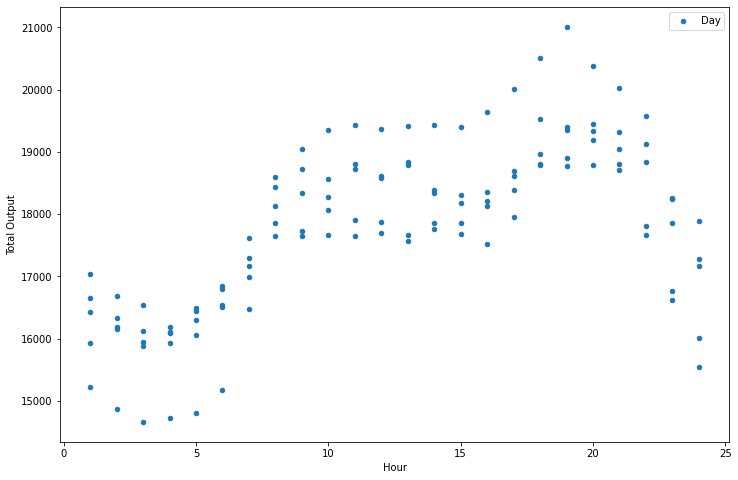

In [9]:
supply.loc['2019-02-04':'2019-02-08',['Hour','Total Output']].plot(figsize=(12,8), kind='scatter',x='Hour', y='Total Output',label='Day');

# Demand Datasets (2017 - 2019) - Load, Join, Process 

## Load Demand Datasets

In [10]:
path = '/content/drive/My Drive/Colab Notebooks/3253 Machine Learning/3253_ML_Final_Project_Candidates/IESO_Dataset_1/'

#2017 Zonal Demand File: PUB_DemandZonal_2017.csv
demand_2017 = pd.read_csv(path+'PUB_DemandZonal_2017.csv', skiprows=3, parse_dates=['Date'])
display(demand_2017.head(3))

#2018
demand_2018 = pd.read_csv(path+'PUB_DemandZonal_2018.csv', skiprows=3, parse_dates=['Date'])
display(demand_2018.head(3))

#2019
demand_2019 = pd.read_csv(path+'PUB_DemandZonal_2019.csv', skiprows=3, parse_dates=['Date'])
display(demand_2019.head(3))

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2017-01-01,1,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268"
1,2017-01-01,2,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673"
2,2017-01-01,3,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974"


,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2018-01-01,1,16627,591,1466,1066,1268,5340,1579,89,3157,477,1489,16522,-105
1,2018-01-01,2,16084,577,1420,985,1300,5211,1516,91,3061,462,1465,16086,2
2,2018-01-01,3,15866,613,1417,943,1316,5096,1471,86,3032,446,1441,15862,-4


,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2019-01-01,1,13198,616,1276,923,900,4617,908,67,2521,367,1190,13384,186
1,2019-01-01,2,12737,609,1301,899,865,4437,870,65,2425,353,1161,12986,249
2,2019-01-01,3,12531,602,1347,869,841,4315,830,63,2380,342,1140,12729,198


## Join Demand Datasets

In [11]:
demand = pd.concat([demand_2017, demand_2018, demand_2019])
display(demand.head(3))
demand.shape

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2017-01-01,1,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268"
1,2017-01-01,2,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673"
2,2017-01-01,3,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974"


(26280, 15)

## Extend Hourly Dataset

Original info:
```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            26280 non-null  datetime64[ns]
 1   Hour            26280 non-null  int64         
 2   Ontario Demand  26280 non-null  int64         
 3   Northwest       26280 non-null  int64         
 4   Northeast       26280 non-null  int64         
 5   Ottawa          26280 non-null  int64         
 6   East            26280 non-null  int64         
 7   Toronto         26280 non-null  int64         
 8   Essa            26280 non-null  int64         
 9   Bruce           26280 non-null  int64         
 10  Southwest       26280 non-null  int64         
 11  Niagara         26280 non-null  int64         
 12  West            26280 non-null  int64         
 13  Zone Total      26280 non-null  int64         
 14  Diff            26280 non-null  object        
dtypes: datetime64[ns](1), int64(13), object(1)
memory usage: 3.2+ MB
```



In [12]:
#demand.Date.
#demand.set_index('Date')
print(demand.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            26280 non-null  datetime64[ns]
 1   Hour            26280 non-null  int64         
 2   Ontario Demand  26280 non-null  int64         
 3   Northwest       26280 non-null  int64         
 4   Northeast       26280 non-null  int64         
 5   Ottawa          26280 non-null  int64         
 6   East            26280 non-null  int64         
 7   Toronto         26280 non-null  int64         
 8   Essa            26280 non-null  int64         
 9   Bruce           26280 non-null  int64         
 10  Southwest       26280 non-null  int64         
 11  Niagara         26280 non-null  int64         
 12  West            26280 non-null  int64         
 13  Zone Total      26280 non-null  int64         
 14  Diff            26280 non-null  object        
dtypes: 

In [105]:
#demand.set_index('Date',inplace=True)
#demand.head(5)

# Move Date column to index
demand = demand.set_index('Date')

# Add weekday column
demand['Day'] = demand.index.strftime('%A')
demand.head(3)

,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Day
Date,,,,,,,,,,,,,,,
2017-01-01,1,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268",Sunday
2017-01-01,2,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673",Sunday
2017-01-01,3,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974",Sunday


## Demand Plots

In [ ]:
df = demand.loc['2017-01-01':'2017-01-07',['Ontario Demand','Toronto']].reset_index()
df.plot(kind='scatter', x='Date', y='Ontario Demand', figsize=(12,8));
df.plot(kind='scatter', x='Date', y='Toronto', figsize=(12,8));
df.plot(kind='scatter', x='Date', y='Ontario Demand', figsize=(12,8));
#month

#quarter


# Merge Supply and Demand Datasets

## Merge Hourly (NEEDS WORK!)

In [27]:
display(supply.head(3))
print('supply shape:',supply.shape)
display(demand.head(3))
print('demand shape:',demand.shape)

,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output,Day
Date,,,,,,,,,
2017-01-01,1,11592,234,2455,2433,0,1,16715,Sunday
2017-01-01,2,11591,235,2523,1994,0,1,16344,Sunday
2017-01-01,3,11596,234,2464,1647,0,1,15942,Sunday


supply shape: (26280, 9)


,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
Date,,,,,,,,,,,,,,
2017-01-01,1,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268"
2017-01-01,2,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673"
2017-01-01,3,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974"


demand shape: (26280, 14)


In [21]:
display(supply.head(3))
display(demand.head(3))

,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output,Day
Date,,,,,,,,,
2017-01-01,1,11592,234,2455,2433,0,1,16715,Sunday
2017-01-01,2,11591,235,2523,1994,0,1,16344,Sunday
2017-01-01,3,11596,234,2464,1647,0,1,15942,Sunday


,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
Date,,,,,,,,,,,,,,
2017-01-01,1,13522,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,268"
2017-01-01,2,13117,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,673"
2017-01-01,3,12816,495,1476,1051,1203,5665,1045,72,2986,465,1334,15790,"2,974"


## Merge Daily Summaries

In [110]:
# Preview the DataFrames:
display(supply.reset_index().set_index(['Date','Hour']).head(3))
print('supply shape:',supply.shape)
display(demand.reset_index().set_index(['Date','Hour']).head(3))
print('demand shape:',demand.shape)

NUCLEAR  GAS  HYDRO  ...  BIOFUEL  Total Output     Day
Date       Hour                       ...                               
2017-01-01 1       11592  234   2455  ...        1         16715  Sunday
           2       11591  235   2523  ...        1         16344  Sunday
           3       11596  234   2464  ...        1         15942  Sunday

[3 rows x 8 columns]

supply shape: (26280, 9)


Ontario Demand  Northwest  ...   Diff     Day
Date       Hour                             ...               
2017-01-01 1              13522        495  ...  2,268  Sunday
           2              13117        495  ...  2,673  Sunday
           3              12816        495  ...  2,974  Sunday

[3 rows x 14 columns]

demand shape: (26280, 15)


In [111]:
# Create a new DataFrame with supply and demand columns:
hourly_s_and_d = supply.reset_index()[['Date','Day','Hour','Total Output']].copy()
hourly_s_and_d['Demand']=demand.reset_index()['Ontario Demand']
hourly_s_and_d

,Date,Day,Hour,Total Output,Demand
0,2017-01-01,Sunday,1,16715,13522
1,2017-01-01,Sunday,2,16344,13117
2,2017-01-01,Sunday,3,15942,12816
3,2017-01-01,Sunday,4,15727,12605
4,2017-01-01,Sunday,5,15653,12563
...,...,...,...,...,...
26275,2019-12-31,Tuesday,20,18282,15909
26276,2019-12-31,Tuesday,21,17563,15198
26277,2019-12-31,Tuesday,22,16828,14678
26278,2019-12-31,Tuesday,23,16568,14136


## Plot Hourly Scatter

In [114]:
hourly_s_and_d.plot(kind='scatter',x='Demand',y='Total Output');

,Total Output,Demand
Date,,
2017-01-01,395129,334736
2017-01-02,400509,354759
2017-01-03,410456,388840
2017-01-04,444225,392245
2017-01-05,450843,417426
...,...,...
2019-12-27,408579,345230
2019-12-28,389732,343583
2019-12-29,415205,352105


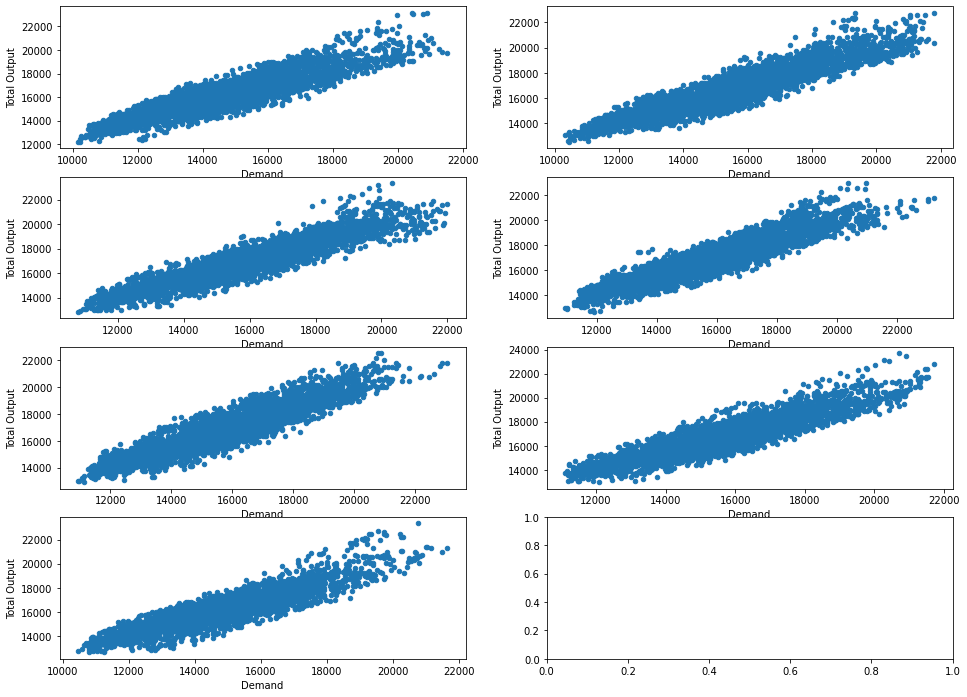

In [122]:
fig = plt.figure(figsize=(16, 12))
ax1 = plt.subplot2grid((4, 2), (0, 0))
ax2 = plt.subplot2grid((4, 2), (0, 1))
ax3 = plt.subplot2grid((4, 2), (1, 0))
ax4 = plt.subplot2grid((4, 2), (1, 1))
ax5 = plt.subplot2grid((4, 2), (2, 0))
ax6 = plt.subplot2grid((4, 2), (2, 1))
ax7 = plt.subplot2grid((4, 2), (3, 0))
ax8 = plt.subplot2grid((4, 2), (3, 1))

hourly_s_and_d[hourly_s_and_d.Day=='Sunday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax1);
hourly_s_and_d[hourly_s_and_d.Day=='Monday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax2);
hourly_s_and_d[hourly_s_and_d.Day=='Tuesday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax3);
hourly_s_and_d[hourly_s_and_d.Day=='Wednesday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax4);

hourly_s_and_d[hourly_s_and_d.Day=='Thursday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax5);
hourly_s_and_d[hourly_s_and_d.Day=='Friday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax6);
hourly_s_and_d[hourly_s_and_d.Day=='Saturday'].plot(kind='scatter',x='Demand',y='Total Output',ax=ax7);

## Plot Daily Scatter

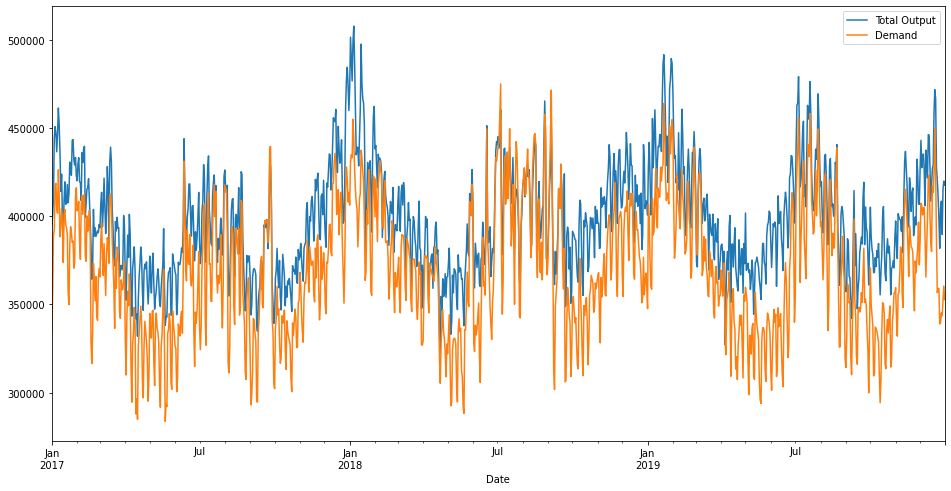

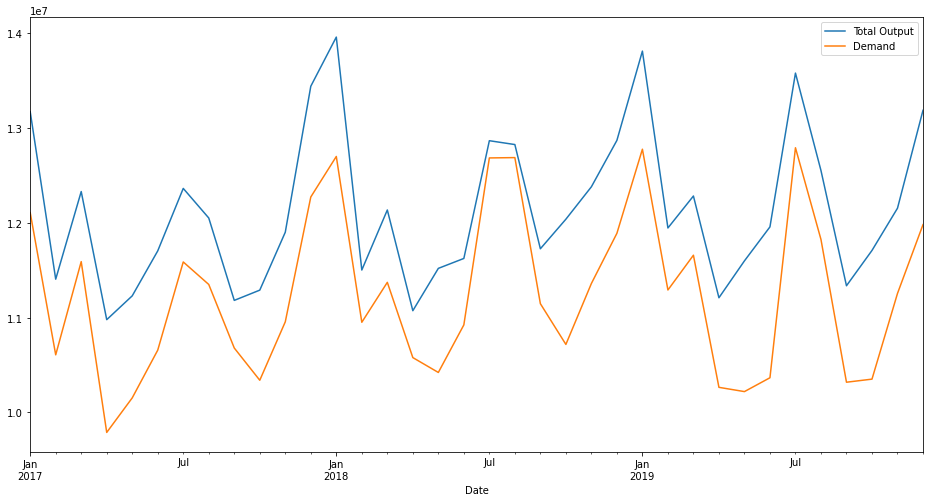

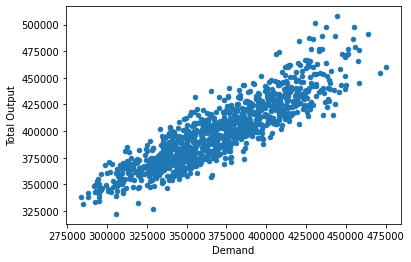

In [127]:
# Create daily summary:
daily_s_and_d = hourly_s_and_d.copy()
daily_s_and_d = daily_s_and_d.set_index('Date')
daily_s_and_d = daily_s_and_d[['Total Output', 'Demand']].resample('D').sum()
daily_s_and_d.plot(figsize=(16,8));
daily_s_and_d.resample('M').sum().plot(figsize=(16,8));

daily_s_and_d.plot(kind='scatter',x='Demand',y='Total Output');

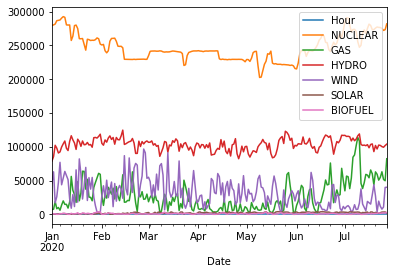

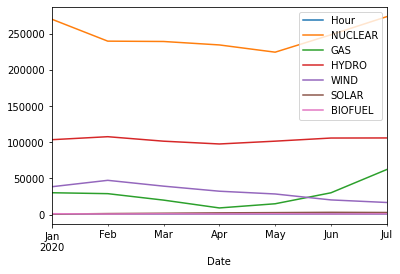

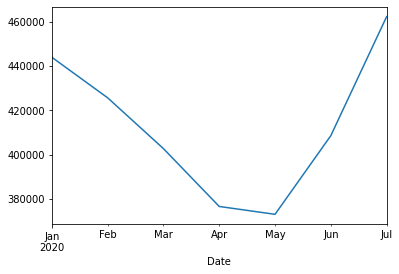

In [ ]:
daily_summary.loc[:,['Hour','NUCLEAR','GAS','HYDRO','WIND','SOLAR','BIOFUEL']].plot(); plt.show()
monthly_summary.loc[:,['Hour','NUCLEAR','GAS','HYDRO','WIND','SOLAR','BIOFUEL']].plot(); plt.show()
monthly_summary['Total Output'].plot();

# Old

In [ ]:
path='/content/IESO-2020-a.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          5016 non-null   object
 1   Hour          5016 non-null   int64 
 2   NUCLEAR       5016 non-null   int64 
 3   GAS           5016 non-null   int64 
 4   HYDRO         5016 non-null   int64 
 5   WIND          5016 non-null   int64 
 6   SOLAR         5016 non-null   int64 
 7   BIOFUEL       5016 non-null   int64 
 8   Total Output  5016 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 352.8+ KB


In [ ]:
df.Date = df.Date.astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5016 non-null   datetime64[ns]
 1   Hour          5016 non-null   int64         
 2   NUCLEAR       5016 non-null   int64         
 3   GAS           5016 non-null   int64         
 4   HYDRO         5016 non-null   int64         
 5   WIND          5016 non-null   int64         
 6   SOLAR         5016 non-null   int64         
 7   BIOFUEL       5016 non-null   int64         
 8   Total Output  5016 non-null   int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 352.8 KB


In [ ]:
daily_summary = df.set_index('Date').resample('D').sum()
monthly_summary = daily_summary.resample('M').mean()
display(daily_summary.head(3))
display(monthly_summary.head(3))


,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output
Date,,,,,,,,
2020-01-01,300,279644,7215,78833,46398,401,335,412826
2020-01-02,300,280390,7449,85506,62910,800,797,437852
2020-01-03,300,281674,18986,102195,16993,209,722,420779


,Hour,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total Output
Date,,,,,,,,
2020-01-31,300.0,270033.064516,30140.709677,103498.580645,38469.612903,594.741935,1172.774194,443909.483871
2020-02-29,300.0,239773.172414,28862.551724,107630.517241,47304.896552,1345.206897,695.689655,425612.034483
2020-03-31,300.0,239305.290323,19941.870968,101434.096774,39251.225806,1824.451613,915.322581,402672.258065


# 2015

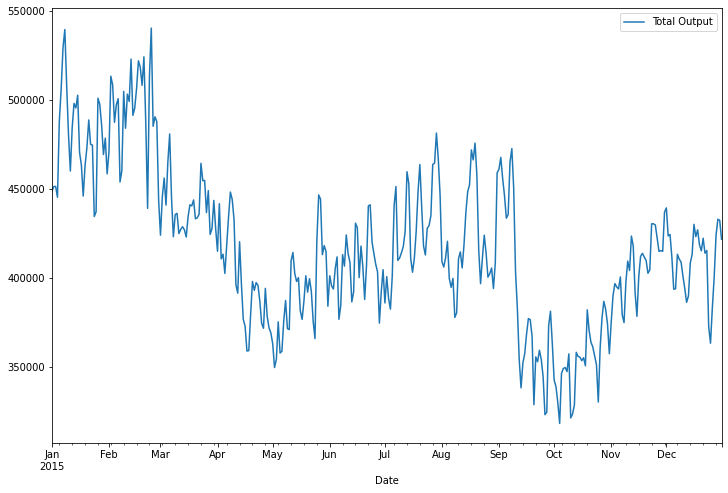

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/3253 Machine Learning/3253_ML_Final_Project_Candidates/IESO_Dataset_1/IESO-2015-a.csv'
df_2015 = pd.read_csv(path)
df_2015.Date = df_2015.Date.astype('datetime64')
daily_2015 = df_2015.set_index('Date').resample('D').sum()
daily_2015.loc[:,['Total Output']].plot(figsize=(12,8));

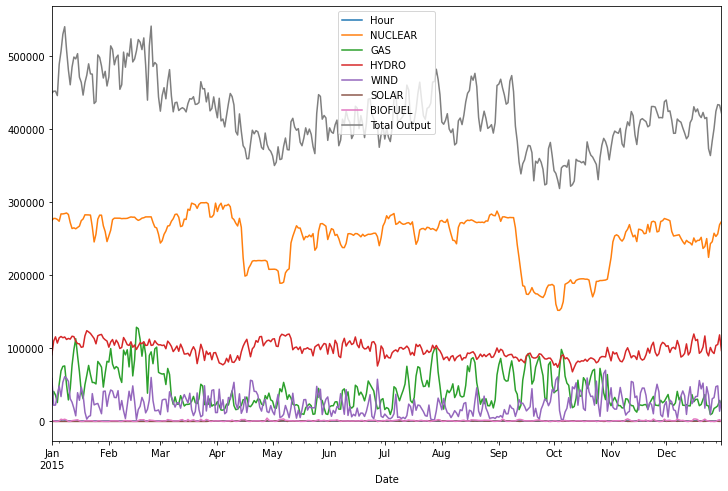

In [ ]:
daily_2015.plot(figsize=(12,8));

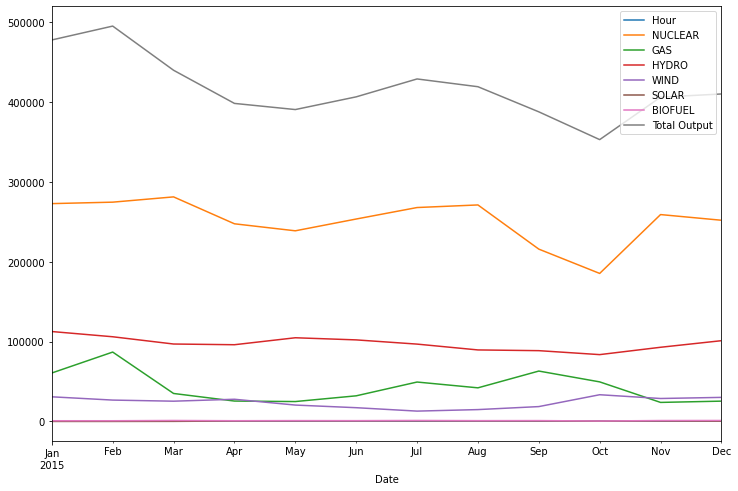

In [ ]:
daily_2015.resample('M').mean().plot(figsize=(12,8));

In [ ]:
path='/content/drive/My Drive/Colab Notebooks/3253 Machine Learning/3253_ML_Final_Project_Candidates/IESO_Dataset_1/2015_Hourly_Demand.csv'
demand_2015 = pd.read_csv(path,skiprows=3)
demand_2015.Date = demand_2020.Date.astype('datetime64')
demand_2015.set_index('Date', inplace=True)
demand_2015.info()
demand_2015.head()

ParserError: ignored

# 2020

In [ ]:
path='/content/drive/My Drive/Colab Notebooks/3253 Machine Learning/3253_ML_Final_Project_Candidates/IESO_Dataset_1/2020_Hourly_Demand.csv'
demand_2020 = pd.read_csv(path,skiprows=3)#, delimiter='\\')
demand_2020.Date = demand_2020.Date.astype('datetime64')
demand_2020.set_index('Date', inplace=True)
demand_2020.info()
demand_2020.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5016 entries, 2020-01-01 to 2020-07-27
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Hour            5016 non-null   int64
 1   Market Demand   5016 non-null   int64
 2   Ontario Demand  5016 non-null   int64
dtypes: int64(3)
memory usage: 156.8 KB


,Hour,Market Demand,Ontario Demand
Date,,,
2020-01-01,1,16565,13219
2020-01-01,2,16193,12895
2020-01-01,3,16072,12554
2020-01-01,4,15930,12360
2020-01-01,5,15963,12353


In [ ]:
fig, ax = plt.figure(figsize=(16, 12))
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))

demand_2020.resample('D').sum().plot(ax=ax1);
daily_2015.loc[:,['Total Output']].plot(ax=ax1);


TypeError: ignored

<Figure size 1152x864 with 0 Axes>